<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Object detection in CARLA </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Approaches overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
1. <b>Mobilenet v2 SSD via TFOD API <br>
📌 2. Retinanet from METAAI</b><br> </div>
</div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 1. Mobilenet v2 SSD</div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:25px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Configuration stage </div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating labels.pbtxt which is mandatory for TFOD    </div>

In [1]:
labels_path = '/kaggle/working/labels.pbtxt'

labels = [
    {'name': 'Vehicle', 'id': 1},
    {'name': 'Bike', 'id': 2},
    {'name': 'Motorbike', 'id': 3},
    {'name': 'Traffic Light', 'id': 4},
    {'name': 'Traffic Sign', 'id': 5},
]

with open(labels_path, 'w') as f:
    for label in labels:
        f.write('item {\n')
        f.write(f'  id: {label["id"]}\n')
        f.write(f'  name: \'{label["name"]}\'\n')
        f.write('}\n')



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Cloning tensorflow models directory    </div>

In [2]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 90080, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 90080 (delta 61), reused 100 (delta 50), pack-reused 89967
Receiving objects: 100% (90080/90080), 606.63 MiB | 36.36 MiB/s, done.
Resolving deltas: 100% (64896/64896), done.



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Building protobuff files    </div>

In [3]:
import os
os.chdir('/kaggle/working/models/research')

In [4]:
!protoc object_detection/protos/*.proto --python_out=.


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Cloning cocoapi    </div>

In [5]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [6]:
os.chdir('cocoapi/PythonAPI')

In [7]:
!make

python setup.py build_ext --inplace
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/opt/conda/lib/python3.10/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /kaggle/working/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
      |       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
      |                                                 ^
../common/maskApi.c: In function ‘rleFrPoly’:
../common/maskApi.c:166:


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Moving cocoapi to research directory    </div>

In [8]:
cp -r pycocotools /kaggle/working/models/research


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Installing tfod via setup.py    </div>

In [9]:
os.chdir('/kaggle/working/models/research')

In [10]:
!cp object_detection/packages/tf2/setup.py .

In [11]:
!pip install  .

Processing /kaggle/working/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 18.3 MB/s eta 0:00:00
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tf-models-official>=2.5.1 from https://files.pythonhosted.org/packages/39/84/fa71440981a298a9a9fa02319e9b43bbe98dafe4e0a91846d679814cd6d4/tf_models_official-2.15.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 10.6 MB/s eta 0:00:00
  Obtaining dependency information for portalocker from https://files.pythonhosted.org/packages/17/9e/87671efcca80ba6203811540ed1f9c0462c1609d2281d7b7f


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Checking if TFOD API is installed or not    </div>

In [12]:
!python object_detection/builders/model_builder_tf2_test.py

2023-12-04 16:57:45.377953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 16:57:45.378066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 16:57:45.379230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Running tests under Python 3.10.12: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1204 16:57:50.651718 135950790743872 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with param


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Ensuring tensorflow version is correctly installed to avoid nightly bugs    </div>

In [13]:
!pip install tensorflow-object-detection-api  --quiet

In [14]:
!pip uninstall tensorflow -y
!pip install -q tensorflow==2.13.0 --quiet
import tensorflow as tf

print(tf.__version__)

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.13.0 which is incompatible.
tensorflowjs 4.13.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
tf-models-official 2.15.0 requires tensorflow~=2.15.0, but you have tensorflow 2.13.0 which is incompatible.
2.13.0



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating config file for mobilenetv2 SSD    </div>

In [15]:
config_path = '/kaggle/working/ssd_mobilenet_v2_coco.config'

config_template = """
model {
  ssd {
    num_classes: NUM_CLASSES
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
        aspect_ratios: 0.3333
      }
    }
    image_resizer {
      fixed_shape_resizer {
        height: 300
        width: 300
      }
    }
    box_predictor {
      convolutional_box_predictor {
        min_depth: 0
        max_depth: 0
        num_layers_before_predictor: 0
        use_dropout: false
        dropout_keep_probability: 0.8
        kernel_size: 1
        box_code_size: 4
        apply_sigmoid_to_scores: false
        conv_hyperparams {
          activation: RELU_6,
          regularizer {
            l2_regularizer {
              weight: 0.00004
            }
          }
          initializer {
            truncated_normal_initializer {
              stddev: 0.03
              mean: 0.0
            }
          }
          batch_norm {
            train: true,
            scale: true,
            center: true,
            decay: 0.9997,
            epsilon: 0.001,
          }
        }
      }
    }
    feature_extractor {
      type: 'ssd_mobilenet_v2_keras'  # Updated to use ssd_mobilenet_v2_keras
      min_depth: 16
      depth_multiplier: 1.0
      conv_hyperparams {
        activation: RELU_6,
        regularizer {
          l2_regularizer {
            weight: 0.00004
          }
        }
        initializer {
          truncated_normal_initializer {
            stddev: 0.03
            mean: 0.0
          }
        }
        batch_norm {
          train: true,
          scale: true,
          center: true,
          decay: 0.9997,
          epsilon: 0.001,
        }
      }
    }
    loss {
      classification_loss {
        weighted_sigmoid {
        }
      }
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      hard_example_miner {
        num_hard_examples: 3000
        iou_threshold: 0.99
        loss_type: CLASSIFICATION
        max_negatives_per_positive: 3
        min_negatives_per_image: 3
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    normalize_loss_by_num_matches: true
    post_processing {
      batch_non_max_suppression {
        score_threshold: 1e-8
        iou_threshold: 0.6
        max_detections_per_class: 100
        max_total_detections: 100
      }
    }
  }
}

train_config {
  batch_size: 24
  optimizer {
    rms_prop_optimizer {
      learning_rate {
        exponential_decay_learning_rate {
          initial_learning_rate: 0.004
          decay_steps: 800720
          decay_factor: 0.95
        }
      }
      momentum_optimizer_value: 0.9
      decay: 0.9
      epsilon: 1.0
    }
  }
  fine_tune_checkpoint: ""
  from_detection_checkpoint: false
}

train_input_reader {
  label_map_path: "/kaggle/working/labels.pbtxt"
  tf_record_input_reader {
    input_path: "/kaggle/working/train.record"
  }
}

eval_config {
  num_examples: 1028
}

eval_input_reader {
  label_map_path: "/kaggle/working/labels.pbtxt"
  shuffle: false
  num_readers: 1
  tf_record_input_reader {
    input_path: "/kaggle/working/test.record"
  }
}
"""

num_classes = len(labels)
config_template = config_template.replace('NUM_CLASSES', str(num_classes))

with open(config_path, 'w') as f:
    f.write(config_template)


<div style="background-color:#A8B4F6; color:#19180F; font-size:25px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Training Stage</div>

<div style="background-color:#D5D9F2; color:#19180F; font-size:20 px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
📌
<b> Creating tfrecords which are mandatory for training the model via TFOD API    <b> </div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules    </div>

In [16]:
import os
import io
import xml.etree.ElementTree as ET
import tensorflow as tf
from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Defining class labels and their correspondng IDs    </div>

In [17]:
LABELS = {
    'Vehicle': 1,
    'Bike': 2,
    'Motorbike': 3,
    'Traffic Light': 4,
    'Traffic Sign': 5,
}

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Initializing paths and addresses    </div>

In [18]:
# Path to the dataset
data_dir = '/kaggle/input/carla-object-detection-dataset/carla-object-detection-dataset/'

# Path to the output TFRecord files
output_dir = '/kaggle/working/'
train_record_path = os.path.join(output_dir, 'train.record')
val_record_path = os.path.join(output_dir, 'test.record')

# Path to the image sets
image_sets_dir = os.path.join(data_dir, 'image_sets')

# Path to the images
images_dir = os.path.join(data_dir, 'images')

# Path to the labels
labels_dir = os.path.join(data_dir, 'labels')

# List of datasets (train and val)
datasets = ['train', 'val']

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Function to create tfrecords   </div>

In [19]:

def create_tf_example(xml_file, image_dir):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find('filename').text
    image_path = os.path.join(image_dir, filename)
    with tf.io.gfile.GFile(image_path, 'rb') as fid:
        encoded_image_data = fid.read()

    image = Image.open(io.BytesIO(encoded_image_data))
    width, height = image.size

    image_format = b'png'
    filename = filename.encode('utf8')

    xmins, ymins, xmaxs, ymaxs, classes_text, classes = [], [], [], [], [], []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        if class_name not in LABELS:
            continue

        classes_text.append(class_name.encode('utf8'))
        classes.append(LABELS[class_name])

        bbox = obj.find('bndbox')
        xmins.append(float(bbox.find('xmin').text) / width)
        ymins.append(float(bbox.find('ymin').text) / height)
        xmaxs.append(float(bbox.find('xmax').text) / width)
        ymaxs.append(float(bbox.find('ymax').text) / height)

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

def create_tf_record(output_path, xml_dir, image_dir):
    writer = tf.io.TFRecordWriter(output_path)
    xml_files = [file for file in os.listdir(xml_dir) if file.endswith('.xml')]

    for xml_file in xml_files:
        xml_path = os.path.join(xml_dir, xml_file)
        tf_example = create_tf_example(xml_path, image_dir)
        writer.write(tf_example.SerializeToString())

    writer.close()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating tfrecord for train and test splits    </div>

In [20]:
create_tf_record(train_record_path, os.path.join(labels_dir, 'train'), os.path.join(images_dir, 'train'))
create_tf_record(val_record_path, os.path.join(labels_dir, 'test'), os.path.join(images_dir, 'test'))


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Training the model for 10000 steps    </div>

In [21]:
!python object_detection/model_main_tf2.py  --num_train_steps=100 --model_dir=/kaggle/working --pipeline_config_path=/kaggle/working/ssd_mobilenet_v2_coco.config

I1204 16:59:56.478133 137941335656256 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1204 16:59:56.501322 137941335656256 config_util.py:552] Maybe overwriting train_steps: 100
I1204 16:59:56.501557 137941335656256 config_util.py:552] Maybe overwriting use_bfloat16: False
W1204 16:59:56.547572 137941335656256 deprecation.py:364] From /opt/conda/lib/python3.10/site-packages/object_detection/model_lib_v2.py:563: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
I1204 16:59:56.555262 137941335656256 dataset_builder.py:162] Reading unweighted datasets: ['/kaggle/working/train.record']
I1204 16:59:56.555517 137941335656256 dataset_builder.py:79] Reading record datasets for input file: ['/kaggle/working/train.record']
I1204 16:59:56.555644 137

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Exporting the trained model for inference    </div>

In [22]:
!python object_detection/exporter_main_v2.py \
    --input_type=image_tensor \
    --pipeline_config_path=/kaggle/working/ssd_mobilenet_v2_coco.config \
    --trained_checkpoint_dir=/kaggle/working \
    --output_directory=/kaggle/working/exported_model


W1204 17:09:43.002327 133754239563584 deprecation.py:641] From /opt/conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
I1204 17:09:48.107504 133754239563584 api.py:460] feature_map_spatial_dims: [(19, 19), (10, 10), (5, 5), (3, 3), (2, 2), (1, 1)]
I1204 17:09:50.533425 133754239563584 convolutional_keras_box_predictor.py:152] depth of additional conv before box predictor: 0
I1204 17:09:50.533935 133754239563584 convolutional_keras_box_predictor.py:152] depth of additional conv before box predictor: 0
I1204 17:09:50.534147 133754239563584 convolutional_keras_box_predictor.py:152] depth of additional

<div style="background-color:#A8B4F6; color:#19180F; font-size:25px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Inference stage </div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>

In [23]:
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import cv2
from matplotlib import pyplot as plt

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading the exported model
    </div>


In [24]:
model_dir = '/kaggle/working/exported_model/saved_model'
model = tf.saved_model.load(model_dir)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading label map    </div>


In [25]:
label_map_path = '/kaggle/working/labels.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(label_map_path, use_display_name=True)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading and preprocessing a random input test image    </div>


In [26]:
image_path = '/kaggle/input/carla-object-detection-dataset/carla-object-detection-dataset/images/test/Town05_002100.png'
image_np = cv2.imread(image_path)
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)  # Converting to RGB
image_np_expanded = np.expand_dims(image_np, axis=0)
image_np_expanded = image_np_expanded.astype(np.uint8)  # Converting to uint8


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Converting the image tensor to a tf.constant    </div>


In [27]:
input_tensor = tf.convert_to_tensor(image_np_expanded, dtype=tf.uint8)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Performing inference   </div>


In [28]:
infer = model.signatures["serving_default"]
output_dict = infer(input_tensor)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Checking if any bounding boxes were detected   </div>


In [29]:
num_boxes = output_dict['detection_boxes'][0].shape[0]
if num_boxes > 0:
    print(f"Number of bounding boxes detected: {num_boxes}")
else:
    print("No bounding boxes detected.")

Number of bounding boxes detected: 100


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Visualizing the results  </div>


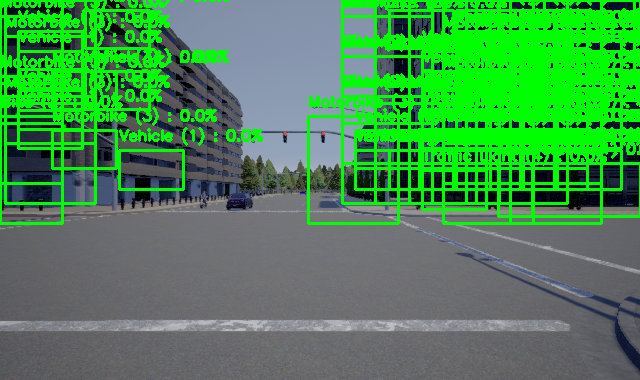

In [32]:
boxes = output_dict['detection_boxes'][0].numpy()
classes = output_dict['detection_classes'][0].numpy().astype(np.int32)
scores = output_dict['detection_scores'][0].numpy()

for i in range(len(boxes)):
    box = boxes[i]
    class_id = classes[i]
    score = scores[i]

    # Converting normalized coordinates to pixel values
    h, w, _ = image_np.shape
    ymin, xmin, ymax, xmax = box
    xmin = int(xmin * w)
    xmax = int(xmax * w)
    ymin = int(ymin * h)
    ymax = int(ymax * h)

    # Drawing rectangle
    color = (0, 255, 0)  # Green color for the rectangle
    thickness = 2
    cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), color, thickness)
    

    # Displaying class and score
    label = f"{category_index[class_id]['name']} ({int(class_id)}) : {round(score * 100, 2)}%"
    cv2.putText(image_np, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

# Displaying the image with bounding boxes using PIL
image_pil = Image.fromarray(image_np)
display(image_pil)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
    📌 <b> Conclusion </b><br>
Training for more steps are desired as we train for only 100 steps due to which coordinates are garbage </div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 2. Retinanet from METAAI</div>

In [ ]:
df